## Notes

This notebook only contains fitting and plotting code for the observed spectrum of HIP 65426 b as of January 2023, for the ExoGRAVITY collaboration. It does not include the code used to extract or flux calibrate this spectrum. The spectrum was extracted from one night of GRAVITY data for which there is a reliable on-axis observation, namely the Jan. 7th, 2021 observation of the system. The spectrum was extracted using the currently (as of Jan. 2023) ExoGRAVITY pipeline (see Appendix B in Nowak et al. 2020 for an outline of the data reduction steps), and flux calibrated using a BT-NextGen spectrum fit to archive photometry of the host, and scaled to match the SPHERE K1 photometry (about a factor of 0.5) of the companion. For more information on this, text for your paper, or for additional plots, contact W. Balmer :~)

This notebook assumes you have installed $\texttt{species}$, a toolkit for analyzing direct imaging observations. You can therefore change the model you fit to the observations (by default, the BT-Settl-Cifist model worked well when I was working on this target for the JWST ERS paper, but there are others listed on the species webpage), the number of live points, etc. and can save plots of the posterior of fit parameters, and the spectrum. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# optional, set my personal preference for plots
# you can use this cell to define your plotting style instead
import seaborn as sb
plt.rcParams['font.family'] = 'monospace'   # Fonts
plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
sb.set_context("paper")

In [3]:
# initialize species
# this notebook will work, even if you have a clean installation of the package
# see https://species.readthedocs.io/ for more
import species
species.SpeciesInit()
database = species.Database()

Initiating species v0.5.4... [DONE]
Database: /Users/wbalmer/exoG/exoGravCode/HIP65426/species_database.hdf5
Data folder: /Users/wbalmer/exoG/exoGravCode/HIP65426/data
Working folder: /Users/wbalmer/exoG/exoGravCode/HIP65426
Grid interpolation method: linear


In [4]:
# can determine your own filepath based on your directory structure
filepref = '../../HIP65426/'

In [7]:
# download and shape up the HIP 65426 b SPHERE spectrum
import urllib.request

urllib.request.urlretrieve('https://home.strw.leidenuniv.nl/~stolker/species/spectra/hip65426_sphere_yjh.dat', filepref+'hip65426_sphere_yjh.dat')

sphere_yjh = pd.read_csv(filepref+'hip65426_sphere_yjh.dat', delim_whitespace=True, comment='#', names=['l','f','fe'])
sphere_yjh = sphere_yjh[2:]
sphere_yjh.to_csv(filepref+'hip65426_sphere_yjh.dat', sep=' ', header=False, index=False)

In [5]:
plx = (9.3031,0.0346)

In [8]:
database.add_object('HIP 65426 b',
                    parallax=plx,
                    app_mag=None,
                    flux_density=None,
                    spectrum={
                              'GRAVITY': (filepref+'HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits', filepref+'HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits', 500.),
                              'SPHERE_IFU': (filepref+'hip65426_sphere_yjh.dat', None, 40.),
                             },
                    deredden=None)

Adding object: HIP 65426 b
   - Parallax (mas) = 9.30 +/- 0.03
   - GRAVITY spectrum:
      - Object: HIP 65426 B
      - Database tag: GRAVITY
      - Filename: ../../HIP65426/HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits
      - Data shape: (192, 3)
      - Wavelength range (um): 2.05 - 2.48
      - Mean flux (W m-2 um-1): 6.48e-17
      - Mean error (W m-2 um-1): 1.60e-17
   - Spectrum:
      - Database tag: SPHERE_IFU
      - Filename: ../../HIP65426/hip65426_sphere_yjh.dat
      - Data shape: (37, 3)
      - Wavelength range (um): 0.99 - 1.64
      - Mean flux (W m-2 um-1): 5.54e-17
      - Mean error (W m-2 um-1): 5.45e-18
   - GRAVITY covariance matrix:
      - Object: HIP 65426 B
      - Database tag: GRAVITY
      - Filename: ../../HIP65426/HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits
      - Data shape: (192, 192)
   - Spectral resolution:
      - GRAVITY: 500.0
      - SPHERE_IFU: 40.0


In [9]:
# add archival companion photometry
database.add_companion(name='HIP 65426 b')

Adding object: HIP 65426 b
   - Parallax (mas) = 9.30 +/- 0.03
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Apparent magnitude = 17.94 +/- 0.05
      - Flux (W m-2 um-1) = 8.73e-17 +/- 4.02e-18
   - Paranal/SPHERE.IRDIS_D_H23_3:
      - Apparent magnitude = 17.58 +/- 0.06
      - Flux (W m-2 um-1) = 1.03e-16 +/- 5.70e-18
   - Paranal/SPHERE.IRDIS_D_K12_1:
      - Apparent magnitude = 17.01 +/- 0.09
      - Flux (W m-2 um-1) = 7.63e-17 +/- 6.33e-18
   - Paranal/SPHERE.IRDIS_D_K12_2:
      - Apparent magnitude = 16.79 +/- 0.09
      - Flux (W m-2 um-1) = 7.21e-17 +/- 5.98e-18
   - Paranal/NACO.Lp:
      - Apparent magnitude = 15.33 +/- 0.12
      - Flux (W m-2 um-1) = 3.88e-17 +/- 4.30e-18
   - Paranal/NACO.NB405:
      - Apparent magnitude = 15.23 +/- 0.22
      - Flux (W m-2 um-1) = 3.21e-17 +/- 6.55e-18
   - Paranal/NACO.Mp:
      - Apparent magnitude = 14.65 +/- 0.29
      - Flux (W m-2 um-1) = 2.99e-17 +/- 8.07e-18


In [10]:
database.add_object('HIP 65426 b',
                    parallax=plx,
                    app_mag={#Carter et al. ERS vegamag
'JWST/NIRCAM.F250M':(17.163, 0.140),
'JWST/NIRCAM.F300M':(16.827, 0.117),
'JWST/NIRCAM.F356W':(16.067, 0.115),
'JWST/NIRCAM.F410M':(15.781, 0.120),
'JWST/NIRCAM.F444W':(15.701, 0.126),
'JWST/MIRI.F1140C':(15.357, 0.093),
'JWST/MIRI.F1550C':(15.197, 0.177)
                            },
                    spectrum=None,
                    deredden=None)

# optionally, can include to remove NACO photometry that disagrees with JWST
# database.delete_data('objects/HIP 65426 b/Paranal/NACO.Lp')
# database.delete_data('objects/HIP 65426 b/Paranal/NACO.NB405')
# database.delete_data('objects/HIP 65426 b/Paranal/NACO.Mp')


Adding object: HIP 65426 b
   - Parallax (mas) = 9.30 +/- 0.03
   - JWST/NIRCAM.F250M:
      - Apparent magnitude = 17.16 +/- 0.14
      - Flux (W m-2 um-1) = 3.45e-17 +/- 4.46e-18
   - JWST/NIRCAM.F300M:
      - Apparent magnitude = 16.83 +/- 0.12
      - Flux (W m-2 um-1) = 2.42e-17 +/- 2.61e-18
   - JWST/NIRCAM.F356W:
      - Apparent magnitude = 16.07 +/- 0.12
      - Flux (W m-2 um-1) = 2.51e-17 +/- 2.66e-18
   - JWST/NIRCAM.F410M:
      - Apparent magnitude = 15.78 +/- 0.12
      - Flux (W m-2 um-1) = 1.92e-17 +/- 2.13e-18
   - JWST/NIRCAM.F444W:
      - Apparent magnitude = 15.70 +/- 0.13
      - Flux (W m-2 um-1) = 1.57e-17 +/- 1.82e-18
   - JWST/MIRI.F1140C:
      - Apparent magnitude = 15.36 +/- 0.09
      - Flux (W m-2 um-1) = 5.25e-19 +/- 4.50e-20
   - JWST/MIRI.F1550C:
      - Apparent magnitude = 15.20 +/- 0.18
      - Flux (W m-2 um-1) = 1.74e-19 +/- 2.85e-20


In [6]:
model_choice = 'bt-settl-cifist'

In [14]:
database.add_model(model=model_choice, teff_range=(1000., 1700.))

Unpacking BT-Settl CIFIST model spectra (1.4 GB)... [DONE]
Wavelength range (um) = 0.1 - 5000
Spectral resolution = 20000
Teff range (K) = 1000.0 - 1700.0
Adding BT-Settl CIFIST model spectra... [DONE]                                     
Grid points stored in the database:
   - Teff = [1200. 1300. 1400. 1500. 1550. 1600. 1650. 1700.]
   - log(g) = [2.5 3.  3.5 4.  4.5 5.  5.5]


In [15]:
inc_spec = True

inc_phot = [
'JWST/NIRCAM.F250M',
'JWST/NIRCAM.F300M',
'JWST/NIRCAM.F356W',
'JWST/NIRCAM.F410M',
'JWST/NIRCAM.F444W',
'JWST/MIRI.F1140C',
'JWST/MIRI.F1550C',
'Paranal/SPHERE.IRDIS_D_H23_2',
'Paranal/SPHERE.IRDIS_D_H23_3',
'Paranal/SPHERE.IRDIS_D_K12_1',
'Paranal/SPHERE.IRDIS_D_K12_2',
           ]

fit = species.FitModel(object_name='HIP 65426 b',
                       model=model_choice,
                       bounds={# 'teff': (1200., 1700.),
                               # 'radius': (0.5, 2.),
                               # 'SPHERE_IFU': ((0.5, 1.5), None),
                               # 'GRAVITY': ((0.5, 1.5), None),
                              },
                       inc_phot=inc_phot,
                       inc_spec=inc_spec,
                       fit_corr=['SPHERE_IFU'],
                       weights=None)


Getting object: HIP 65426 b... [DONE]
Interpolating JWST/NIRCAM.F250M... [DONE]
Interpolating JWST/NIRCAM.F300M... [DONE]
Interpolating JWST/NIRCAM.F356W... [DONE]
Interpolating JWST/NIRCAM.F410M... [DONE]
Interpolating JWST/NIRCAM.F444W... [DONE]
Interpolating JWST/MIRI.F1140C... [DONE]
Interpolating JWST/MIRI.F1550C... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Interpolating GRAVITY... [DONE]
Interpolating SPHERE_IFU... [DONE]
Fitting 6 parameters:
   - teff
   - logg
   - radius
   - parallax
   - corr_len_SPHERE_IFU
   - corr_amp_SPHERE_IFU
Prior boundaries:
   - teff = (1200.0, 1700.0)
   - logg = (2.5, 5.5)
   - radius = (0.5, 5.0)
   - corr_len_SPHERE_IFU = (-3.0, 0.0)
   - corr_amp_SPHERE_IFU = (0.0, 1.0)
Weights for the log-likelihood function:
   - GRAVITY = 1.00e+00
   - SPHERE_IFU = 1.00e+00
   - JWST

In [16]:
tag='hip65426-plusjwst'

In [17]:
fit.run_multinest(tag=tag,
                  n_live_points=300,
                  output='multinest/',
                  prior={'mass': (7.1, 1.1)} # prior from evol model, can include or disregard
                 )

Running nested sampling with MultiNest...
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  300
 dimensionality =    6
 *****************************************************


/opt/anaconda3/envs/exog/lib/python3.10/site-packages/pymultinest/run.py:208: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  nargs = len(inspect.getargspec(LogLikelihood).args) - inspect.ismethod(LogLikelihood)
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 36;
tau: [198.27242547]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 36;
tau: [208.38940229]


 ln(ev)=   9041.9453852890438      +/-  0.20955185248653591     
  analysing data from multinest/.txt
 Total Likelihood Evaluations:        15651
 Sampling finished. Exiting MultiNest
Nested sampling global log-evidence: 9041.95 +/- 0.21
Nested importance sampling global log-evidence: 9041.47 +/- 0.03
Sample with the highest likelihood:
   - Log-likelihood = 9057.74
   - teff = 1666.49
   - logg = 3.89
   - radius = 1.52
   - parallax = 9.33
   - corr_len_SPHERE_IFU = -1.49
   - corr_amp_SPHERE_IFU = 0.57
Integrated autocorrelation time:
   - teff: 198.27
   - logg: 9.76
   - radius: 208.39
   - parallax: 5.95
   - corr_len_SPHERE_IFU: 2.10
   - corr_amp_SPHERE_IFU: 17.19


Median sample:
   - teff = 1.67e+03
   - logg = 3.91e+00
   - radius = 1.37e+00
   - parallax = 9.30e+00
   - corr_len_SPHERE_IFU = -1.63e+00
   - corr_amp_SPHERE_IFU = 6.04e-01
Plotting the posterior...

/opt/anaconda3/envs/exog/lib/python3.10/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/envs/exog/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


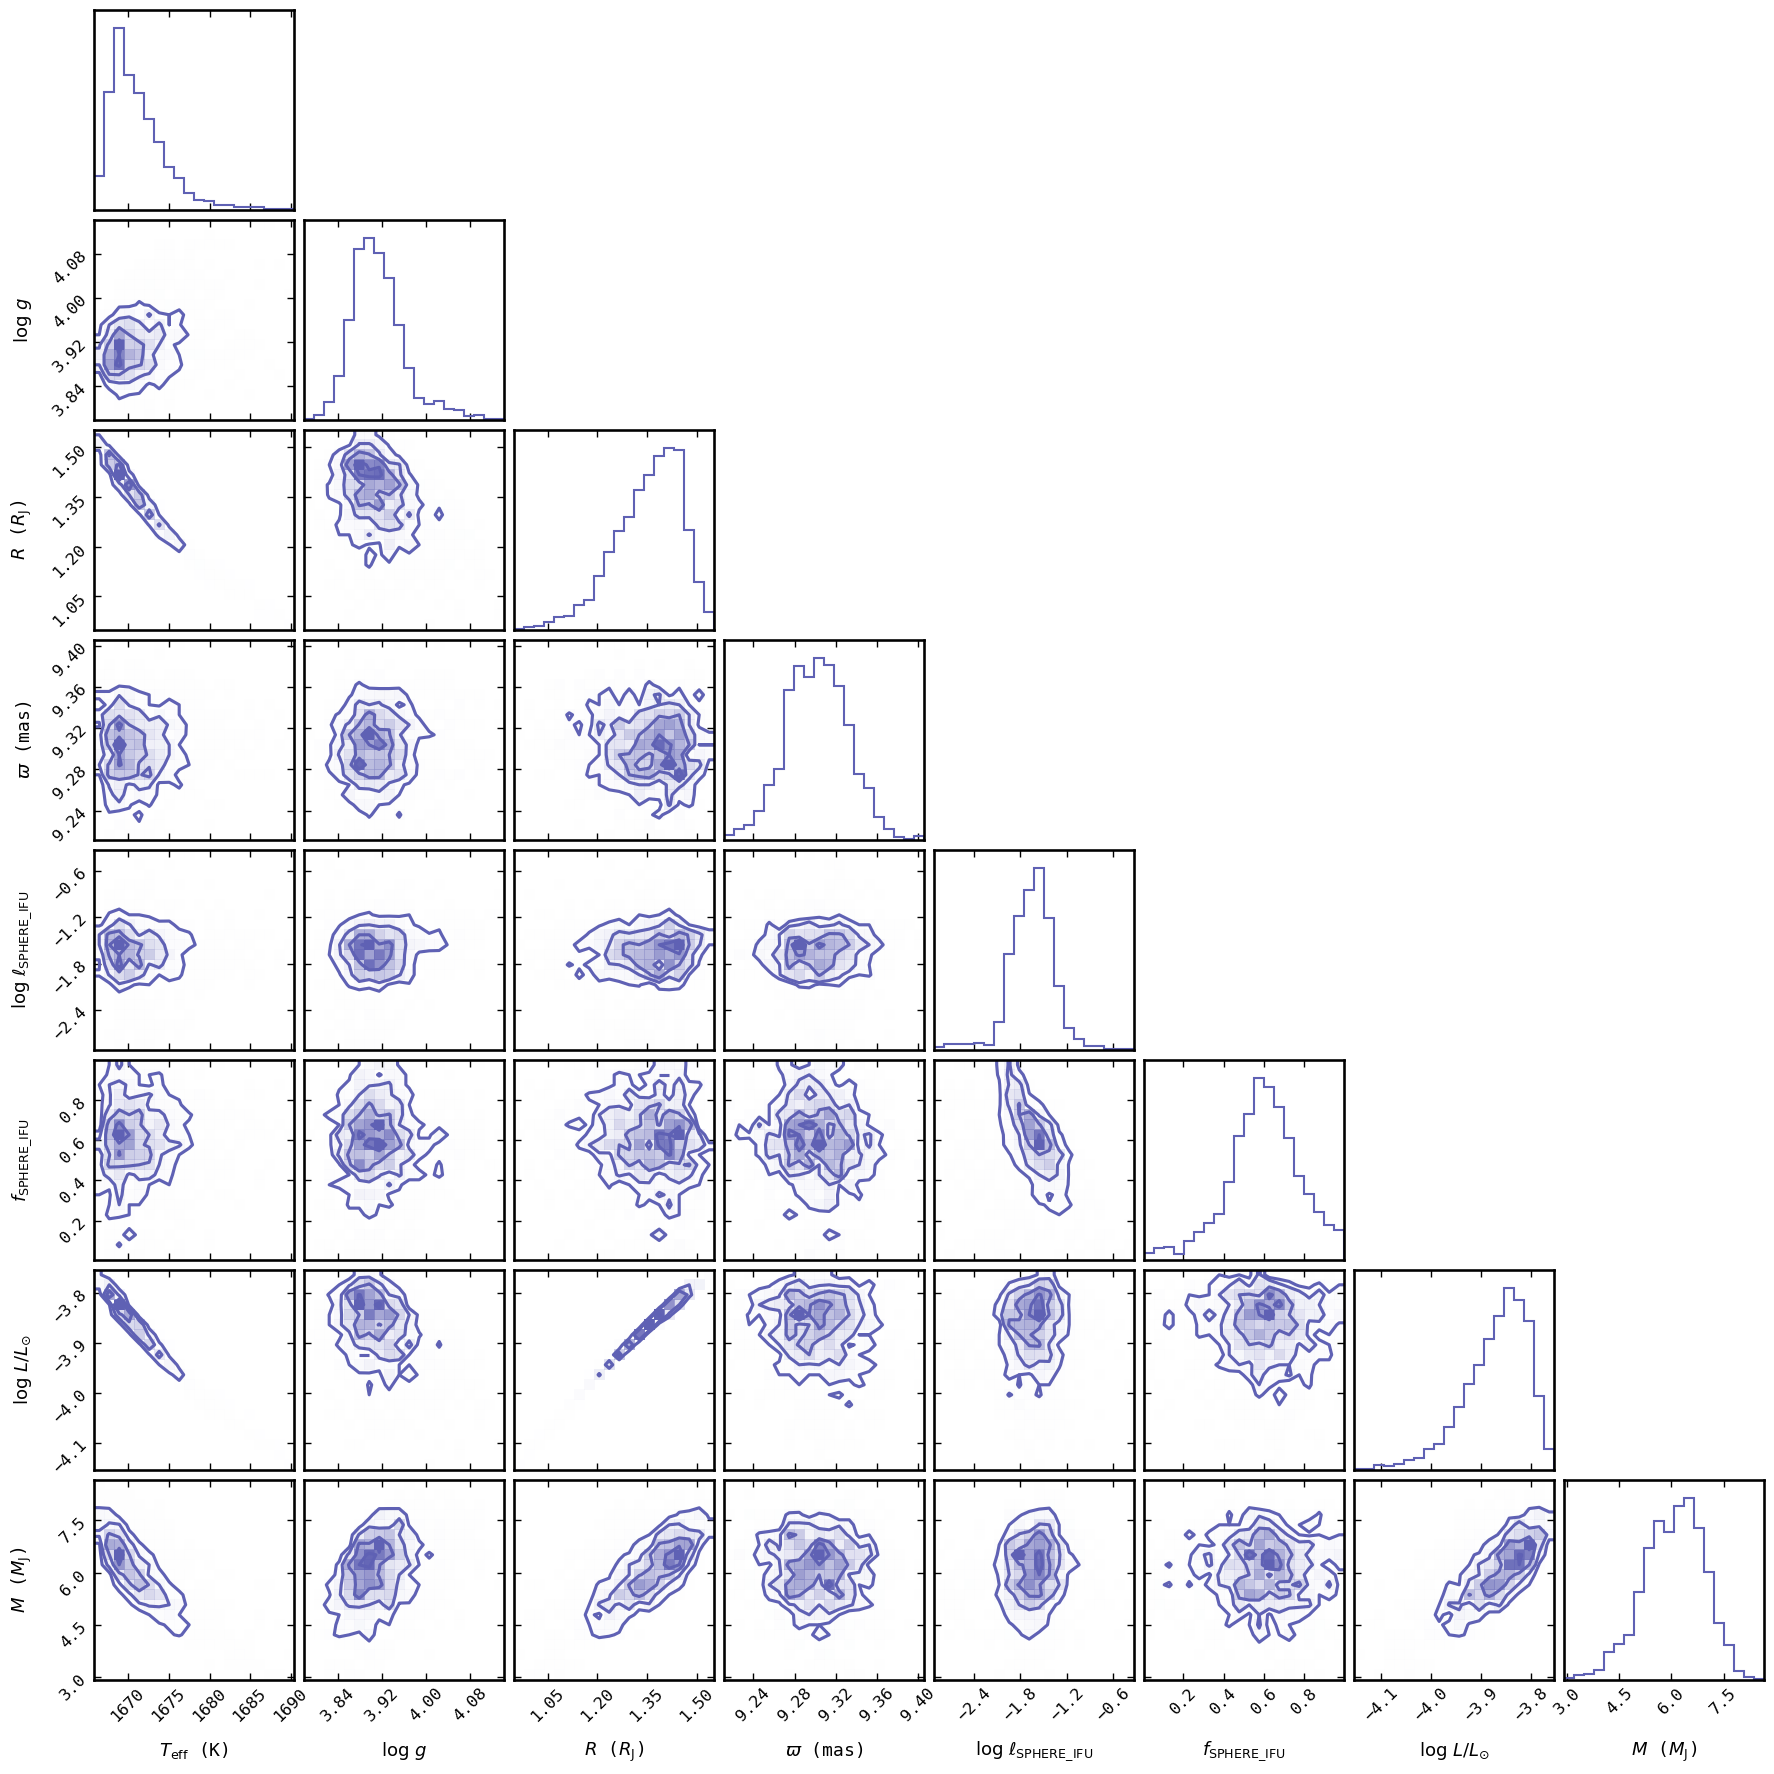

In [18]:
post = species.plot_posterior(tag=tag,
                       offset=(-0.3 , -0.3),
                       # title_fmt=['.0f', '.2f', '.2f', '.2f', '.2f', '.2f', '.3f', '.1f'],
                       inc_luminosity=True,
                       inc_mass=True,
                       output=None)

In [22]:
samples = database.get_mcmc_spectra(tag=tag,
                                    random=30,
                                    wavel_range=None,
                                    spec_res=500.)

best = database.get_median_sample(tag=tag)

read_model = species.ReadModel(model=model_choice,
                               wavel_range=None)

modelbox = read_model.get_model(model_param=best,
                                spec_res=500.,
                                smooth=True)

objectbox = database.get_object(object_name='HIP 65426 b',
                                inc_phot=True,
                                inc_spec=True)

objectbox = species.update_spectra(objectbox=objectbox,
                                   model_param=best)

residuals = species.get_residuals(datatype='model',
                                  spectrum=model_choice,
                                  parameters=best,
                                  objectbox=objectbox,
                                  inc_phot=True,
                                  inc_spec=True)

synphot = species.multi_photometry(datatype='model',
                                   spectrum=model_choice,
                                   filters=objectbox.filters,
                                   parameters=best)

species.plot_spectrum(boxes=[samples, modelbox, objectbox, synphot],
                      filters=objectbox.filters,
                      residuals=residuals,
                      plot_kwargs=[{'ls': '-', 'lw': 0.2, 'color': 'gray'},
                                   {'ls': '-', 'lw': 1., 'color': 'black'},
                                   {'GRAVITY': {'marker': '.', 'ms': 5., 'mew': 0., 'color': 'seagreen', 'ls': 'none', 'alpha': 0.3, 'label': 'GRAVITY'},
                                    'SPHERE_IFU': {'marker': 's', 'ms': 5., 'mew': 0., 'color': 'cornflowerblue', 'ls': '', 'alpha': 1, 'label': 'SPHERE IFU'},
                                    'Paranal/NACO.Lp': {'marker': 's', 'ms': 5., 'color': 'tomato', 'ls': 'none', 'label':'NACO'},
                                    'Paranal/NACO.NB405': {'marker': 's', 'markersize': 5., 'color': 'tomato', 'ls': 'none'},
                                    'Paranal/NACO.Mp': {'marker': 's', 'markersize': 5., 'color': 'tomato', 'ls': 'none'},
                                    'JWST/NIRCAM.F250M': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none', 'label':'NIRCAM'},
                                    'JWST/NIRCAM.F300M': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none'},
                                    'JWST/NIRCAM.F356W': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none'},
                                    'JWST/NIRCAM.F410M': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none'},
                                    'JWST/NIRCAM.F444W': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none'},
                                    'JWST/MIRI.F1140C': {'marker': 's', 'markersize': 5., 'color': 'purple', 'ls': 'none', 'label':'MIRI'},
                                    'JWST/MIRI.F1550C': {'marker': 's', 'markersize': 5., 'color': 'purple', 'ls': 'none'}
                                   },
                                    None],
                      xlim=(0.8, 20.),
                      # ylim=(1.15e-20, 2e-16),
                      ylim_res=(-6., 6.),
                      scale=('log', 'linear'),
                      offset=(-0.4, -0.05),
                      legend=[{'loc': 'lower left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 12.}],
                      figsize=(12., 6.),
                      quantity='flux density',
                      output=filepref+'HIP65426b-SED.pdf'
                     )

Getting MCMC spectra:   0%|          | 0/30 [00:00<?, ?it/s]

Getting object: HIP 65426 b... [DONE]
Calculating synthetic photometry...

/Users/wbalmer/species/species/read/read_model.py:710: UserWarning: The 'corr_len_SPHERE_IFU' parameter is not required by 'bt-settl-cifist' so the parameter will be ignored. The mandatory parameters are ['teff', 'logg'].
  warnings.warn(
/Users/wbalmer/species/species/read/read_model.py:710: UserWarning: The 'corr_amp_SPHERE_IFU' parameter is not required by 'bt-settl-cifist' so the parameter will be ignored. The mandatory parameters are ['teff', 'logg'].
  warnings.warn(
/Users/wbalmer/species/species/util/read_util.py:176: DeprecationWarning: The update_spectra function is deprecated and will be removed in a future release. Please use the update_objectbox function instead.
  warnings.warn(


 [DONE]
Calculating residuals... [DONE]
Residuals (sigma):
   - JWST/MIRI.F1140C: -1.88
   - JWST/MIRI.F1550C: 0.12
   - JWST/NIRCAM.F250M: -0.15
   - JWST/NIRCAM.F300M: -0.26
   - JWST/NIRCAM.F356W: -0.29
   - JWST/NIRCAM.F410M: -0.13
   - JWST/NIRCAM.F444W: 1.48
   - Paranal/NACO.Lp: 3.32
   - Paranal/NACO.Mp: 2.66
   - Paranal/NACO.NB405: 1.73
   - Paranal/SPHERE.IRDIS_D_H23_2: 1.14
   - Paranal/SPHERE.IRDIS_D_H23_3: -1.68
   - Paranal/SPHERE.IRDIS_D_K12_1: 1.43
   - Paranal/SPHERE.IRDIS_D_K12_2: -0.51
   - GRAVITY: min: -1.89, max: 2.48
   - SPHERE_IFU: min: -1.78, max: 2.19
Reduced chi2 = 0.84
Number of degrees of freedom = 237
Calculating synthetic photometry... [DONE]
plotting spectrum residuals
Plotting spectrum: ../../HIP65426/HIP65426b-SED.pdf... [DONE]
